<a href="https://colab.research.google.com/github/activs1/machine_learning_exercises/blob/master/sklearn_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Classification of digits from digits dataset sklearn
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, ShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits

Decision tree classifier
Acc train Decision Tree: 0.9730
Acc test Decision Tree: 0.8537
Classification report Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        59
           1       0.79      0.84      0.81        49
           2       0.86      0.86      0.86        49
           3       0.87      0.83      0.85        64
           4       0.87      0.85      0.86        61
           5       0.81      0.94      0.87        47
           6       0.98      0.90      0.94        51
           7       0.88      0.89      0.89        57
           8       0.75      0.83      0.78        46
           9       0.74      0.70      0.72        57

    accuracy                           0.85       540
   macro avg       0.85      0.86      0.85       540
weighted avg       0.86      0.85      0.85       540

Confusion matrix Decion Tree:
     0   1   2   3   4   5   6   7   8   9
0  54   0   0   0   1   1   0   0   3   0


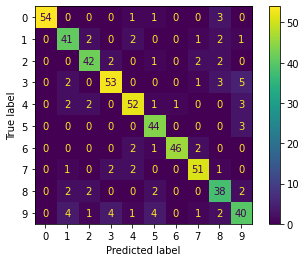

Cross val acc mean Decision Tree: 0.8438
Cross val AUC mean (0 vs all) Decision Tree: 0.9763 
Cross val AUC mean (9 vs all) Decision Tree: 0.8673 


----------------------------------------


Random forest classifier
Acc train Random Forest: 1.0000
Acc test Random Forest: 0.9722
Classification report Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.98      0.98      0.98        49
           2       1.00      1.00      1.00        49
           3       0.98      0.92      0.95        64
           4       0.97      1.00      0.98        61
           5       0.90      0.98      0.94        47
           6       1.00      1.00      1.00        51
           7       0.98      0.98      0.98        57
           8       0.96      0.96      0.96        46
           9       0.95      0.95      0.95        57

    accuracy                           0.97       540
   macro avg       0.97      0.9

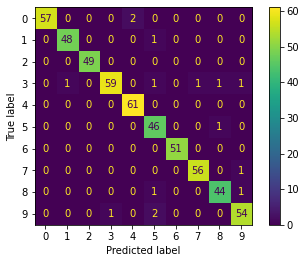

Cross val acc mean Random Forest: 0.9680
Cross val AUC mean (0 vs all) Random Forest: 0.9997 
Cross val AUC mean (9 vs all) Random Forest: 0.9906 


In [ ]:
X, y = load_digits(return_X_y=True)

labels = np.unique(y)

cv = ShuffleSplit(n_splits = 15, test_size = 0.3)

print("Decision tree classifier\n")
# DECISION TREE
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Create classifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 2)

# Train
dt.fit(X_train, y_train)

# Accuracy for train and test
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Acc train Decision Tree: {:.4f}".format(accuracy_score(y_train, y_pred_train)))
print("Acc test Decision Tree: {:.4f}".format(accuracy_score(y_test, y_pred_test)))

# Classification report
print("Classification report Decision Tree:\n", classification_report(y_test, y_pred_test, labels=labels))

# Confusion matrix
print("Confusion matrix Decion Tree:\n", pd.DataFrame(confusion_matrix(y_test, y_pred_test, labels=labels), index=labels, columns=labels))
plot_confusion_matrix(dt, X_test, y_test, labels=labels)
plt.show()

# Cross validation with accuracies and AUC (0 vs all, 9 vs all)
dt = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 2)

scores_acc = cross_val_score(dt, X, y, scoring = 'accuracy', cv=cv) 
print("Cross val acc mean Decision Tree: {:.4f}".format(scores_acc.mean()))

# 0 vs all
y_auc = y == 0
scores_auc = cross_val_score(dt, X, y_auc, scoring = 'roc_auc', cv=cv) 
print("Cross val AUC mean (0 vs all) Decision Tree: {:.4f} ".format(scores_auc.mean()))

y_auc = y == 9
scores_auc = cross_val_score(dt, X, y_auc, scoring = 'roc_auc', cv=cv) 
print("Cross val AUC mean (9 vs all) Decision Tree: {:.4f} ".format(scores_auc.mean()))

print("\n\n----------------------------------------\n\n")

print("Random forest classifier\n")
# RANDOM FOREST
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Create classifier
rf = RandomForestClassifier(n_estimators = 40, criterion = 'gini', max_depth = 10, min_samples_split = 5)

# Train
rf.fit(X_train, y_train)

# Accuracy for train and test
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Acc train Random Forest: {:.4f}".format(accuracy_score(y_train, y_pred_train)))
print("Acc test Random Forest: {:.4f}".format(accuracy_score(y_test, y_pred_test)))

# Classification report
print("Classification report Random Forest:\n", classification_report(y_test, y_pred_test, labels=labels))

# Confusion matrix
print("Confusion matrix Random Forest:\n", pd.DataFrame(confusion_matrix(y_test, y_pred_test, labels=labels), index=labels, columns=labels))
plot_confusion_matrix(rf, X_test, y_test, labels=labels)
plt.show()

# Cross validation with accuracies and AUC (0 vs all, 9 vs all)
rf = RandomForestClassifier(n_estimators = 40, criterion = 'gini', max_depth = 10, min_samples_split = 2)

scores_acc = cross_val_score(rf, X, y, scoring = 'accuracy', cv=cv) 
print("Cross val acc mean Random Forest: {:.4f}".format(scores_acc.mean()))

# 0 vs all
y_auc = y == 0
scores_auc = cross_val_score(rf, X, y_auc, scoring = 'roc_auc', cv=cv) 
print("Cross val AUC mean (0 vs all) Random Forest: {:.4f} ".format(scores_auc.mean()))

# 9 vs all
y_auc = y == 9
scores_auc = cross_val_score(rf, X, y_auc, scoring = 'roc_auc', cv=cv) 
print("Cross val AUC mean (9 vs all) Random Forest: {:.4f} ".format(scores_auc.mean()))



# Decision tree classifier appears to be overfitted (0.97 train accuracy vs 0.85 test accuracy)
# Maybe optimization maximum depth of the tree could be used to avoid overfitting

# Random Forest classifier is not overfitted (1.0 vs 0.97)
# it has also very high values of precision and recall for all of the classes
# from which we can conclude about high classifcation ability of the model
# Additionally the model has shown very high values in crossvalidation (both Accuracy and binary AUC - 0 vs all and 9 vs all)